# CSE 6367 
# Programming Assignment 3 (P3)

## Eigenfaces (100 points)

### Task1 (30 points)
1. Load all the 25 images in the "/Eigenfaces/Train"
2. Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

### Task 1

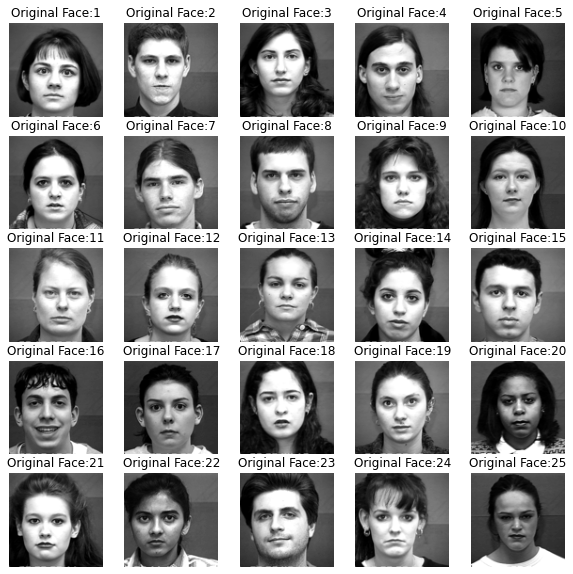

In [1]:
#load all libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Task 1-1: Load all the 25 images in the "/Eigenfaces/Train"
image_path = "./Eigenfaces/Train"

###Create a list of all the image filenames in the directory
img_file = os.listdir(image_path)
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

#Task 1-2: Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
for i, img_filename in enumerate(img_file):
    img = Image.open(os.path.join(image_path, img_filename))
    img=img.resize((100, 100))
    row = i // 5
    col = i % 5
    axs[row][col].imshow(img,cmap="gray")
    axs[row][col].axis('off')
    axs[row][col].set_title(f"Original Face:{i+1}")
plt.show()

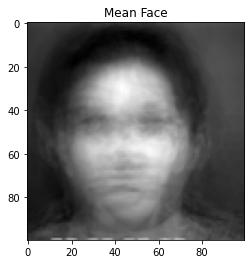

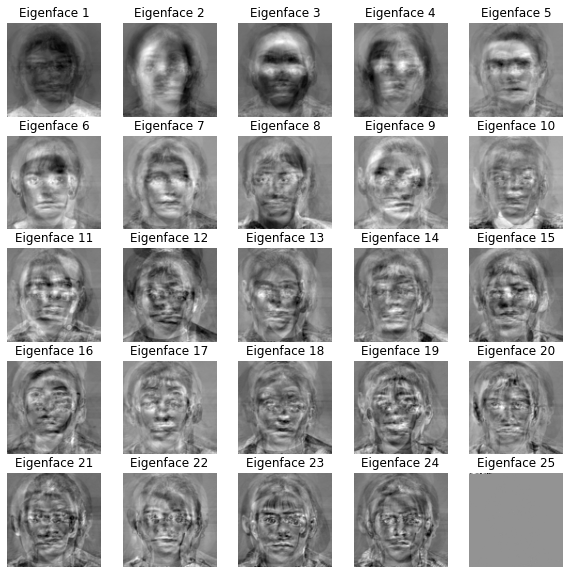

In [2]:
train_images = []
for i, img_filename in enumerate(img_file):
    img = Image.open(os.path.join(image_path, img_filename))
    img = img.resize((100, 100))
    img=np.array(img).flatten()
    train_images.append(np.array(img))
train_images = np.array(train_images)

#Task 1-3: Find the mean face image.
mean_face = np.mean(train_images, axis=0)

#Task 1-4: Display the mean face. Resize the mean face to 100X100 pixels for display only
mean_face_img = mean_face.reshape((100, 100))
plt.imshow(mean_face_img, cmap="gray")
plt.title("Mean Face")
plt.show()
##Subtract the mean face from the training images for centered pictures
train_centered_image = train_images - mean_face
# print(train_centered_image.shape)

##Reshape the images into 2D arrays
h, w = train_centered_image.shape
train_images = train_centered_image.reshape(h,w)#n_samples, h*w)
# print(train_images.shape)


#Task 1-3: Perform PCA on the training faces.
n_components = 25
pca = PCA(n_components=n_components, whiten=True)
pca.fit(train_centered_image)


#Task 1-5: Diplay all the eigenfaces in a 5X5 grid.
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for i in range(25):
    eigenface = pca.components_[i].reshape((100, 100))
    row = i // 5
    col = i % 5
    axs[row][col].imshow(eigenface,cmap="gray")
    axs[row][col].axis('off')
    axs[row][col].set_title(f"Eigenface {i+1}")

plt.show()

### Task2 (30 points)

1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

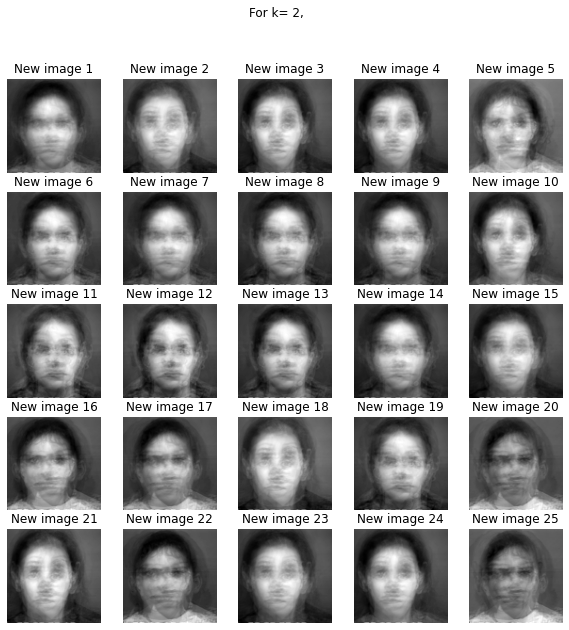

In [3]:
#Task 2-1: Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
def reconstruct_image(k,train_centered_image,pca):
    ##first k principal components
    k_eigenfaces=pca.components_[:k] 
    
    ##reconstruct the training faces for k eigenvalues using numpy
    reconstructed_faces= np.dot(np.dot(train_centered_image,k_eigenfaces.T),k_eigenfaces)+mean_face
    fig, axs = plt.subplots(5, 5, figsize=(10, 10))
    fig.suptitle(f"For k= {k},\n")
    for i in range(25):
        row = i // 5
        col = i % 5
        reconstructed_image=reconstructed_faces[i].reshape((100,100))
        axs[row][col].imshow(reconstructed_image,cmap="gray")
        axs[row][col].axis('off')
        axs[row][col].set_title(f"New image {i+1}")
    plt.show()
    
#Task 2-2:Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
reconstruct_image(2,train_centered_image,pca) 

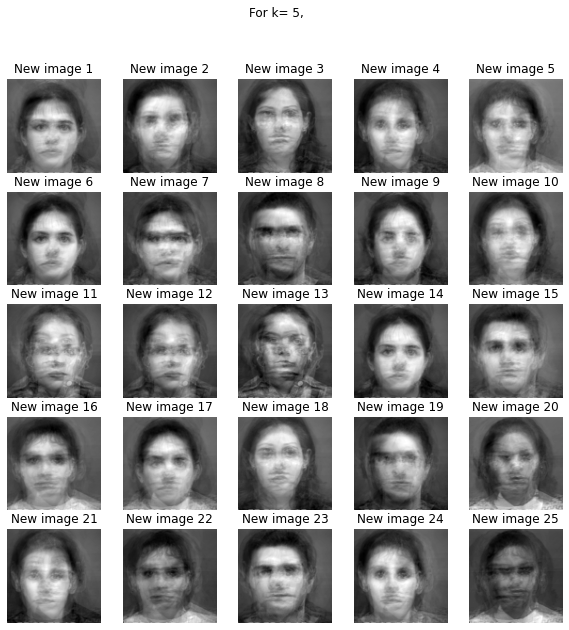

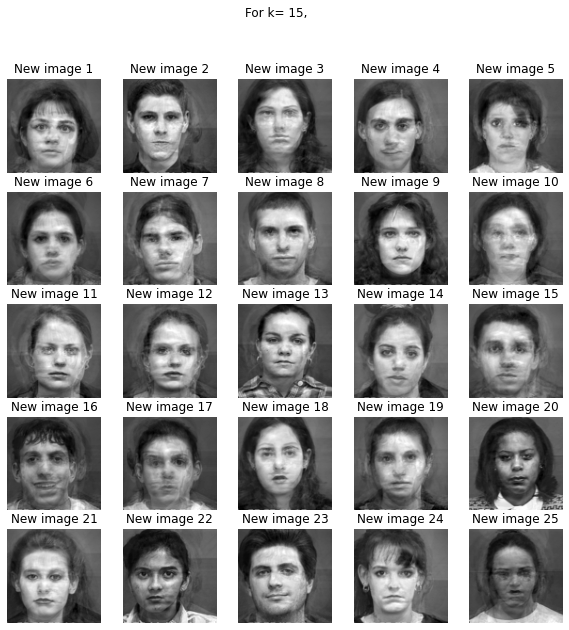

In [4]:
#Task 2-3: Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

k_values=[5,15]
for k in k_values:
    reconstruct_image(k,train_images,pca)

### Task3 (40 points)
1. Load all the test images from "/Eigenfaces/Test"
2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 5, k = 15.

In [5]:
#Task 3-1: Load all the test images from "/Eigenfaces/Test"
test_directory = "./Eigenfaces/Test"
train_directory = "./Eigenfaces/Train"
##Task 3-2:Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
def find_face_or_not(train_dir,test_dir,k,threshold):
    test_files=os.listdir(test_dir)
    test_images = []
    for filename in os.listdir(test_dir):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.convert('L')  
        img = img.resize((100, 100)) 
        img=np.array(img).flatten()
        test_images.append(np.array(img))
    train_files=os.listdir(train_dir)
    train_images = []
    for filename in os.listdir(train_dir):
        img = Image.open(os.path.join(train_dir, filename))
        img = img.convert('L') 
        img = img.resize((100, 100))
        img=np.array(img).flatten()
        train_images.append(np.array(img))
    

    ##Scale the training and testing images
    scaler = StandardScaler()
    train_images_scaled = scaler.fit_transform(train_images)
    scaler = StandardScaler()
    test_images_scaled = scaler.fit_transform(test_images)

    ##Perform PCA on the training images
    pca = PCA(n_components=k)
    pca.fit(train_images_scaled)
    eigenfaces=pca.components_[:k]
    ##Project each train and test image onto the eigenvectors
    train_images_pca=np.dot(train_images_scaled,eigenfaces.T)   
    test_images_pca=np.dot(test_images_scaled,eigenfaces.T)
    fig, axs = plt.subplots(nrows=len(test_files), ncols=2, figsize=(10, 50))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)    
    fig.suptitle(f"For k= {k},\n")

    ##plot the images
    for i in range(len(test_images)):
        test_image_pca = test_images_pca[i]
        #euclidian distance from training images
        distances = np.linalg.norm(test_image_pca-train_images_pca , axis=1)
        if(np.min(distances)<=threshold):
            closest_idx = np.argmin(distances)  
            train_image=Image.open(os.path.join(train_dir, train_files[closest_idx]))
            test_image=Image.open(os.path.join(test_dir, test_files[i]))
            axs[i, 0].imshow(test_image, cmap='gray', aspect='equal')    
            axs[i, 1].imshow(train_image, cmap='gray', aspect='equal')
            axs[i,0].set_title(f"test image : {i+1}")
            axs[i,1].set_title(f"distance({np.min(distances): .3f})")
            axs[i,0].axis('off')
            axs[i,1].axis('off')
        else:
            test_image=Image.open(os.path.join(test_dir, test_files[i]))
            axs[i, 0].imshow(test_image, cmap='gray', aspect='equal')  
            axs[i,0].set_title(f"test image : {i+1}")          
            axs[i,1].set_title(f"not a face")
            axs[i,0].axis('off')
            axs[i,1].axis('off')

    plt.tight_layout()
    plt.show()
    return

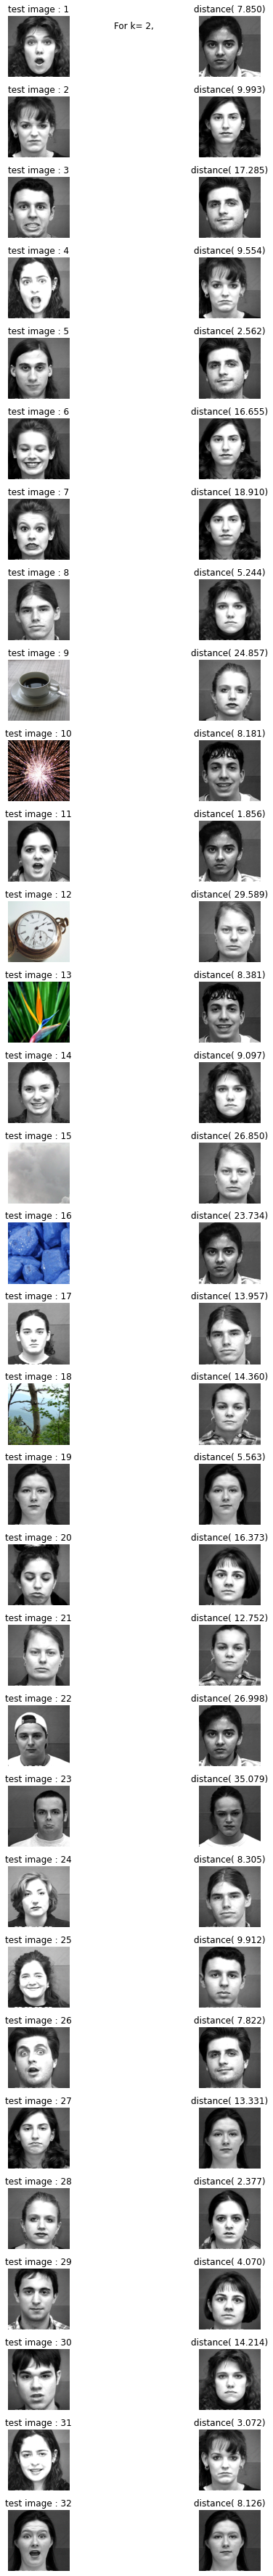

In [6]:
##Task 3-3:Display all the results in an M X 2 table, where M is total number of test images.
k_values=2
threshold=55
find_face_or_not(train_directory,test_directory,k_values,threshold)

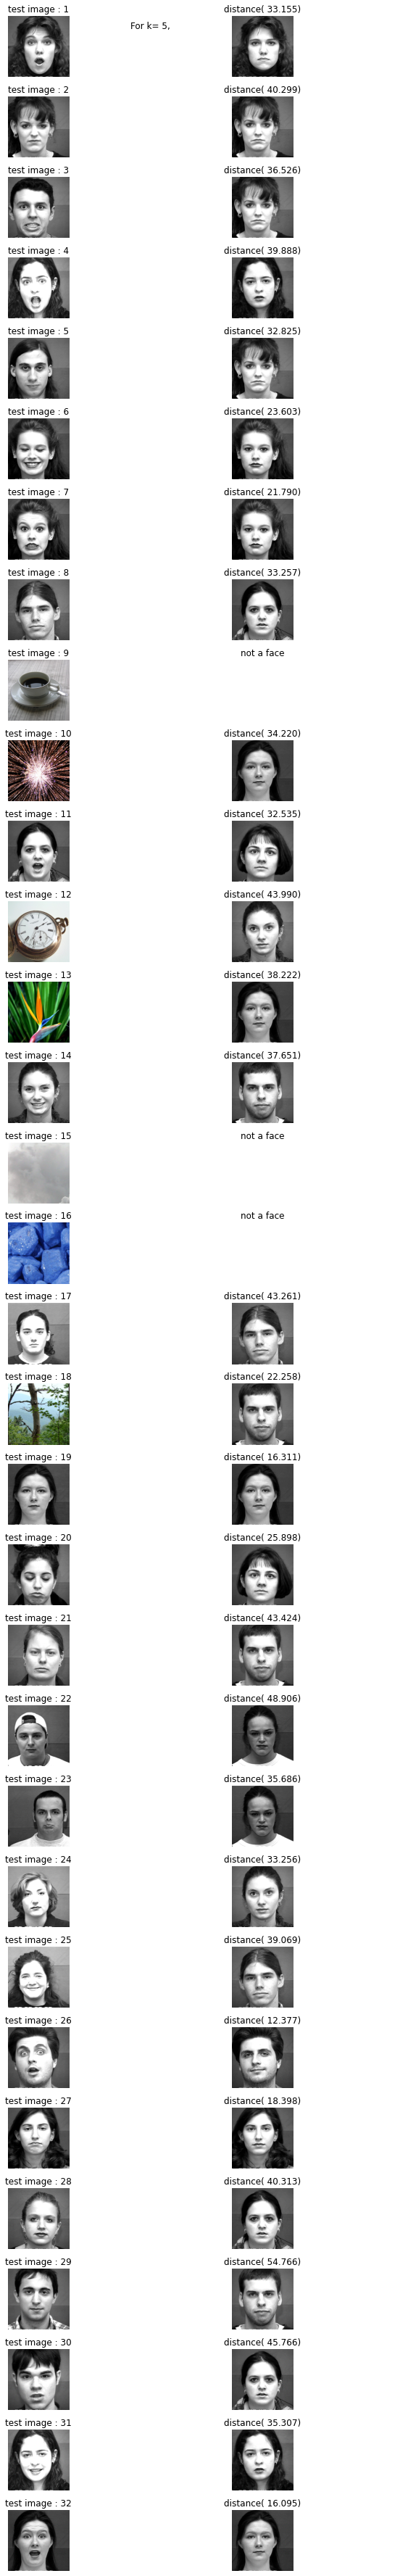

In [7]:
##Task 3-4: Repeat the process and display the results for k = 5, find if it's a face or not.
k_values=5
threshold=55
find_face_or_not(train_directory,test_directory,k_values,threshold)

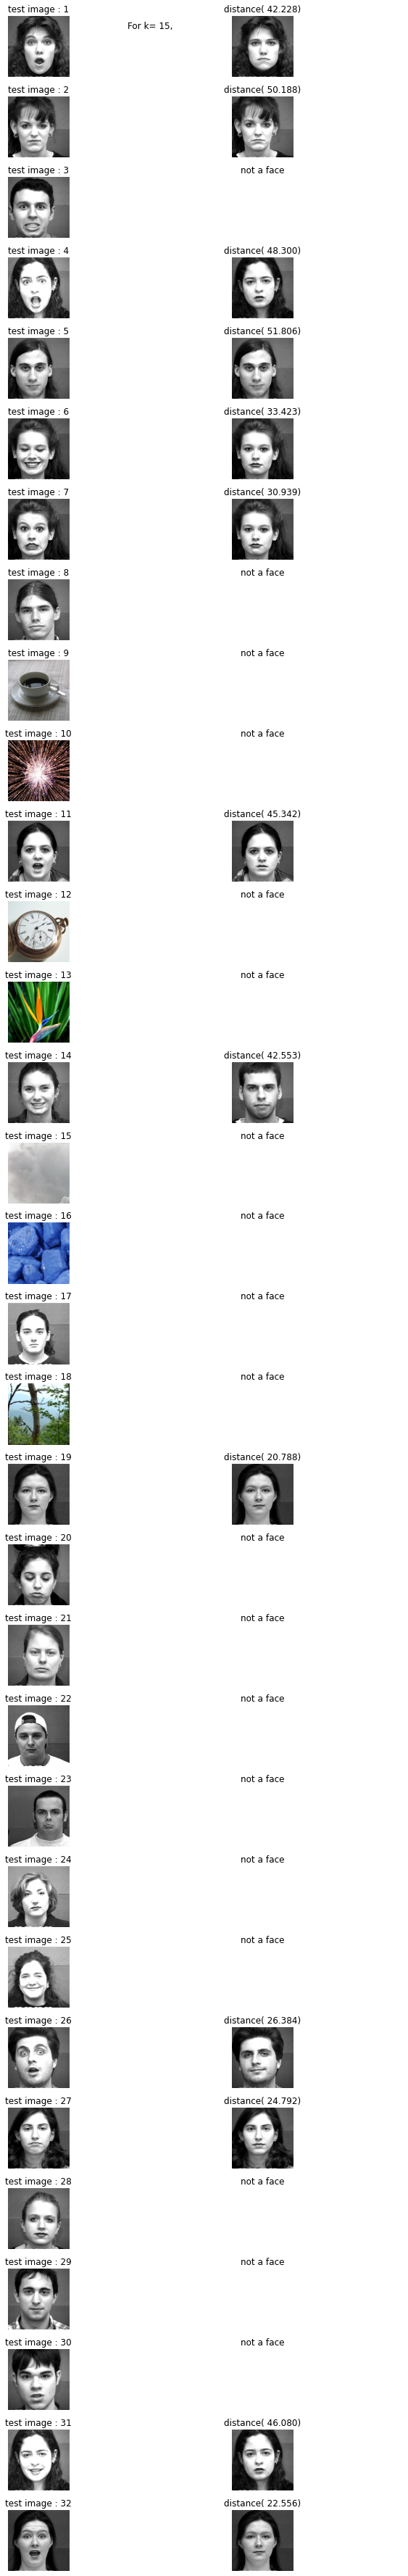

In [8]:
##Task 3-4: Repeat the process and display the results for k = 15,  find if it's a face or not.
k_values=15
threshold=55
find_face_or_not(train_directory,test_directory,k_values,threshold)

### Submission Guidelines:
1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb
2. Import all the images from the ./Eigenfaces directory. Your TA will use the same directory name to grade your submission.
3. You don't need to attach the dataset with your submission.

Assignment Courtesy: Prof. Farhad Kamangar, CSE@UTA